# step 1、确定数据来源
数据来源于seaborn的内置数据集

In [3]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

打印seaborn的内置数据集，包含这个航空人数预测的数据集，也包含我们熟悉的泰坦尼克的数据集。

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

查看数据集包含的信息：

In [6]:
flight_data = sns.load_dataset("flights")
flight_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [7]:
flight_data.shape

(144, 3)

（144,3）表明有12年的数据。
# step 2、数据探索（可视化）

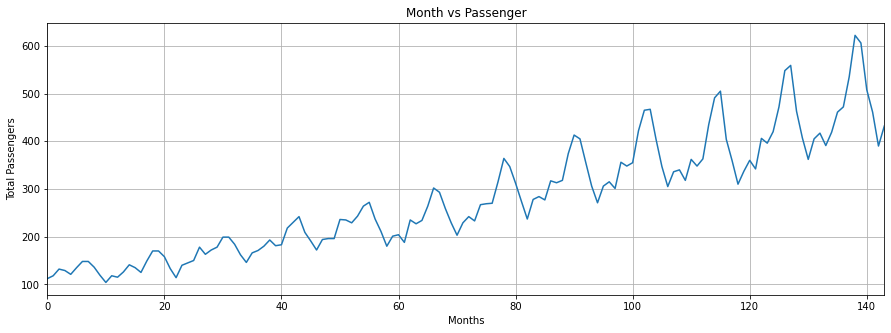

In [8]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size  # 图片大小

plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(flight_data['passengers'])  # 只画一列

# step 3、数据处理

In [9]:
flight_data.columns

Index(['year', 'month', 'passengers'], dtype='object')

将passengers 转化为 float 类型

In [10]:
all_data = flight_data['passengers'].values.astype(float)
print(all_data)

[112. 118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126.
 141. 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163.
 172. 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218.
 230. 242. 209. 191. 172. 194. 196. 196. 236. 235. 229. 243. 264. 272.
 237. 211. 180. 201. 204. 188. 235. 227. 234. 264. 302. 293. 259. 229.
 203. 229. 242. 233. 267. 269. 270. 315. 364. 347. 312. 274. 237. 278.
 284. 277. 317. 313. 318. 374. 413. 405. 355. 306. 271. 306. 315. 301.
 356. 348. 355. 422. 465. 467. 404. 347. 305. 336. 340. 318. 362. 348.
 363. 435. 491. 505. 404. 359. 310. 337. 360. 342. 406. 396. 420. 472.
 548. 559. 463. 407. 362. 405. 417. 391. 419. 461. 472. 535. 622. 606.
 508. 461. 390. 432.]


In [11]:
test_data_size = 12

train_data = all_data[:-test_data_size]  # 训练集
test_data = all_data[-test_data_size:]  # 测试集

print(len(train_data))  # 训练
print(len(test_data))   # 测试数据

132
12


标准化数据以进行时间序列预测非常重要

In [12]:
from sklearn.preprocessing import MinMaxScaler  # 标准化

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

In [13]:
# 查看标准化的数据
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-0.96483516]
 [-0.93846154]
 [-0.87692308]
 [-0.89010989]
 [-0.92527473]]
[[1.        ]
 [0.57802198]
 [0.33186813]
 [0.13406593]
 [0.32307692]]


PyTorch模型是使用张量训练的。要将数据集转换为张量，我们可以简单地将数据集传递给FloatTensor对象的构造函数

In [14]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1) 
# 将数据加工成pytorch的变量
train_data_normalized  # 查看数据

tensor([-0.9648, -0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066,
        -0.8593, -0.9341, -1.0000, -0.9385, -0.9516, -0.9033, -0.8374, -0.8637,
        -0.9077, -0.8022, -0.7099, -0.7099, -0.7626, -0.8725, -0.9560, -0.8418,
        -0.8198, -0.7978, -0.6747, -0.7407, -0.7011, -0.6747, -0.5824, -0.5824,
        -0.6484, -0.7451, -0.8154, -0.7275, -0.7055, -0.6659, -0.6088, -0.6615,
        -0.6527, -0.4989, -0.4462, -0.3934, -0.5385, -0.6176, -0.7011, -0.6044,
        -0.5956, -0.5956, -0.4198, -0.4242, -0.4505, -0.3890, -0.2967, -0.2615,
        -0.4154, -0.5297, -0.6659, -0.5736, -0.5604, -0.6308, -0.4242, -0.4593,
        -0.4286, -0.2967, -0.1297, -0.1692, -0.3187, -0.4505, -0.5648, -0.4505,
        -0.3934, -0.4330, -0.2835, -0.2747, -0.2703, -0.0725,  0.1429,  0.0681,
        -0.0857, -0.2527, -0.4154, -0.2352, -0.2088, -0.2396, -0.0637, -0.0813,
        -0.0593,  0.1868,  0.3582,  0.3231,  0.1033, -0.1121, -0.2659, -0.1121,
        -0.0725, -0.1341,  0.1077,  0.07

接下来，我们将定义一个名为的函数create_inout_sequences。该函数将接受原始输入数据，并将返回一个元组列表。在每个元组中，第一个元素将包含与12个月内旅行的乘客数量相对应的12个项目的列表，第二个元组元素将包含一个项目，即在12 + 1个月内的乘客数量。

In [15]:
train_window = 12  # 每次训练的个数

def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

该函数2个变量，分别为 input_data 以及 tw（表示train_window），label表示预测的

In [16]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

在这里 input 2个变量，train data的归一化数据，以及训练的windows

In [17]:
# 查看数据
train_inout_seq[:5]

[(tensor([-0.9648, -0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066,
          -0.8593, -0.9341, -1.0000, -0.9385]),
  tensor([-0.9516])),
 (tensor([-0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593,
          -0.9341, -1.0000, -0.9385, -0.9516]),
  tensor([-0.9033])),
 (tensor([-0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341,
          -1.0000, -0.9385, -0.9516, -0.9033]),
  tensor([-0.8374])),
 (tensor([-0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000,
          -0.9385, -0.9516, -0.9033, -0.8374]),
  tensor([-0.8637])),
 (tensor([-0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000, -0.9385,
          -0.9516, -0.9033, -0.8374, -0.8637]),
  tensor([-0.9077]))]

# step 4、定义pytorch的LSTM的训练模型
LSTM该类的构造函数接受三个参数：
input_size：对应于输入中的要素数量。尽管我们的序列长度为12，但每个月我们只有1个值，即乘客总数，因此输入大小为1。
hidden_layer_size：指定隐藏层的数量以及每层中神经元的数量。我们将有一层100个神经元。
output_size：输出中的项目数，由于我们要预测未来1个月的乘客人数，因此输出大小为1。
接下来，在构造函数中，我们创建变量hidden_layer_size，lstm，linear，和hidden_cell。

LSTM算法接受三个输入：先前的隐藏状态，先前的单元状态和当前输入。该hidden_cell变量包含先前的隐藏状态和单元状态。的lstm和linear层变量用于创建LSTM和线性层。

In [18]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
		# 隐藏层
        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [19]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [20]:
epochs = 150

# inout_seq 是准备好的训练数据
for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)  #损失函数
        single_loss.backward() #前向
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

epoch:   1 loss: 0.05932026
epoch:  26 loss: 0.00304427
epoch:  51 loss: 0.00102740
epoch:  76 loss: 0.00560504
epoch: 101 loss: 0.00092915
epoch: 126 loss: 0.00064189


# step 5 、模型预测
预测的 idea：该test_inputs项目将包含12个项目。在for循环内，这12个项目将用于对测试集中的第一个项目进行预测，即项目编号133。然后将预测值附加到test_inputs列表中。在第二次迭代中，最后12个项目将再次用作输入，并将进行新的预测，然后将其test_inputs再次添加到列表中。for由于测试集中有12个元素，因此该循环将执行12次。在循环末尾，test_inputs列表将包含24个项目。最后12个项目将是测试集的预测值。

In [21]:
fut_pred = 12

test_inputs = train_data_normalized[-train_window:].tolist()  # 最后12个
print(test_inputs)

[0.12527473270893097, 0.04615384712815285, 0.3274725377559662, 0.2835164964199066, 0.3890109956264496, 0.6175824403762817, 0.9516483545303345, 1.0, 0.5780220031738281, 0.33186814188957214, 0.13406594097614288, 0.32307693362236023]


In [22]:
model.eval()
# 预测的值为12个
for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

model.eval()作用

相信各位在pytorch的模型训练/预测代码中总会看到model.eval ()，那这个函数到底是什么意思呢？ 在模型中，我们通常会加上Dropout层和batch normalization层，在模型预测阶段，我们需要将这些层设置到预测模式，model.eval ()就是帮我们一键搞定的，如果在预测的时候忘记使用model.eval ()，会导致不一致的预测结果。

模型结果（包含在test_input中）

我们选用train的后12个作为input，将结果添加到input中去，最终获得24个值，其中后12个为预测的值。

In [23]:
test_inputs[fut_pred:]

[0.853868842124939,
 0.9011542201042175,
 1.3459727764129639,
 0.6407036185264587,
 1.3643397092819214,
 1.7740051746368408,
 1.2508049011230469,
 1.5478415489196777,
 2.103020668029785,
 1.0598852634429932,
 1.5386488437652588,
 1.8772187232971191]

In [24]:
# 通过反归一化，获得实际的预测值
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[525.75516158]
 [536.51258507]
 [637.70880663]
 [477.26007321]
 [641.88728386]
 [735.08617723]
 [616.05811501]
 [683.63395238]
 [809.93720198]
 [572.62389743]
 [681.54261196]
 [758.56725955]]


# step 6、预测结果可视化

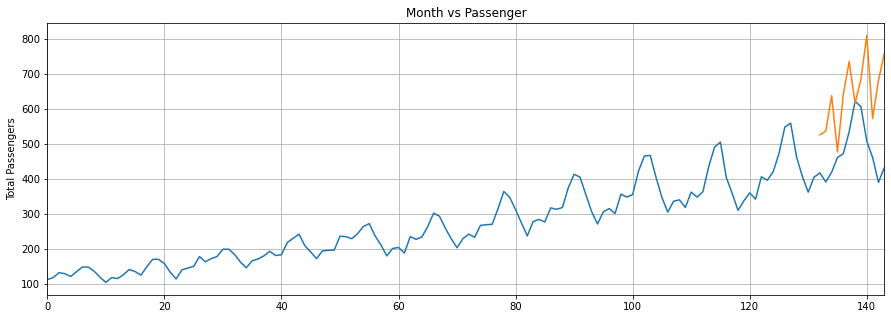

In [25]:
x = np.arange(132, 144, 1)
# print(x)
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'])
plt.plot(x,actual_predictions)
plt.show()

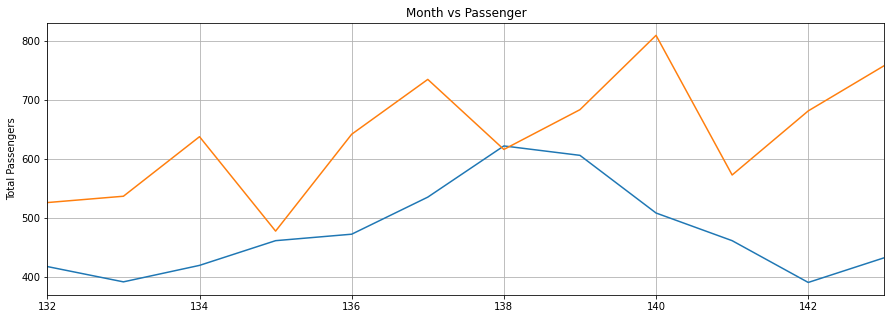

In [26]:
# 将范围放大
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)

plt.plot(flight_data['passengers'][-train_window:])
plt.plot(x,actual_predictions)
plt.show()